<a href="https://colab.research.google.com/github/debashisdotchatterjee/Indian-Dengue-Joint-Renewal-Fatality-Hierarchical-Model/blob/main/Indian_Dengu_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Website: https://ncvbdc.mohfw.gov.in/index4.php?lang=1&level=0&lid=3715&linkid=431

In [ ]:
Notes:

“NR” values are recorded as missing (blank/NA).

2025 is marked as provisional (till Aug 2025) and flagged in the tidy sheet (Provisional = True).

The “India Total (source)” row exactly mirrors the totals provided

'National summary (annualized) by year'

,Year,Cases,Deaths,Exposure,AnnCases,AnnDeaths,CFR_reported,CFR_annualized,YoY_Cases_Growth,YoY_Deaths_Growth
0,2019,157315.0,166.0,1.000000,157315.0,166.0,0.00106,0.00106,NaN,NaN
1,2020,44585.0,56.0,1.000000,44585.0,56.0,0.00126,0.00126,-0.71659,-0.66265
2,2021,193245.0,346.0,1.000000,193245.0,346.0,0.00179,0.00179,3.33431,5.17857
3,2022,233251.0,303.0,1.000000,233251.0,303.0,0.00130,0.00130,0.20702,-0.12428
4,2023,289235.0,485.0,1.000000,289235.0,485.0,0.00168,0.00168,0.24002,0.60066
5,2024,233519.0,297.0,1.000000,233519.0,297.0,0.00127,0.00127,-0.19263,-0.38763
6,2025,49573.0,42.0,0.666667,74359.5,63.0,0.00085,0.00085,-0.68157,-0.78788


'Top 12 states by 2025* annualized cases'

,StateUT,AnnCases,AnnDeaths,CFR_annualized
0,Tamil Nadu,17737.5,10.5,0.000592
1,Kerala,12388.5,46.5,0.003753
2,Maharashtra,10168.5,0.0,0.000000
3,Telangana,6444.0,0.0,0.000000
4,Karnataka,6421.5,0.0,0.000000
5,Gujarat,2593.5,0.0,0.000000
6,Uttar Pradesh,2469.0,0.0,0.000000
7,Andhra Pradesh,2115.0,3.0,0.001418
8,Odisha,1869.0,0.0,0.000000
9,Rajasthan,1564.5,0.0,0.000000


'Relative Risk vs baseline (head of table)'

,StateUT,Year,AnnCases,RR_vs_base,RR_baseline_year
0,A& N Island,2019,168.0,1.000000,2019
1,A& N Island,2020,98.0,0.583333,2019
2,A& N Island,2021,175.0,1.041667,2019
3,A& N Island,2022,1014.0,6.035714,2019
4,A& N Island,2023,846.0,5.035714,2019
...,...,...,...,...,...
115,Karnataka,2022,9889.0,0.582185,2019
116,Karnataka,2023,19300.0,1.136230,2019
117,Karnataka,2024,32886.0,1.936065,2019
118,Karnataka,2025,6421.5,0.378047,2019


'Detected change-points (eta jumps) — head'

,StateUT,Year,abs_delta_eta
48,Nagaland,2024,4.201971
70,West Bengal*,2024,3.676332
36,Lakshadweep,2022,3.616077
4,Arunachal Pradesh,2025,3.582282
10,Chandigarh,2025,3.466712
68,Uttrakhand,2020,3.229783
0,A& N Island,2025,3.155009
5,Arunachal Pradesh,2020,3.102019
49,Nagaland,2023,2.874697
64,Tripura,2023,2.657818


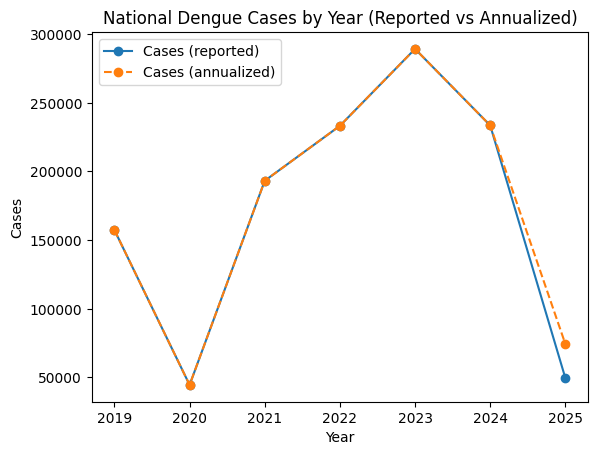

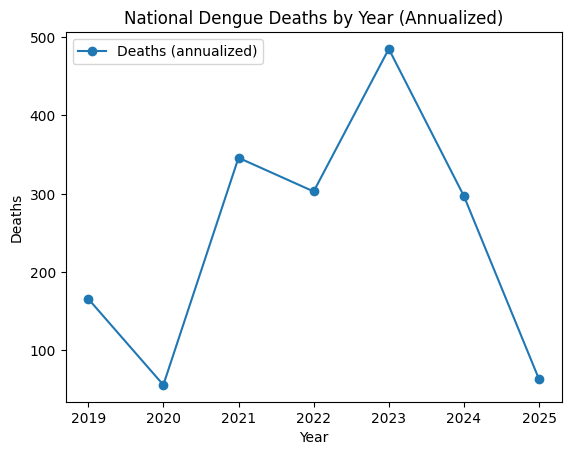

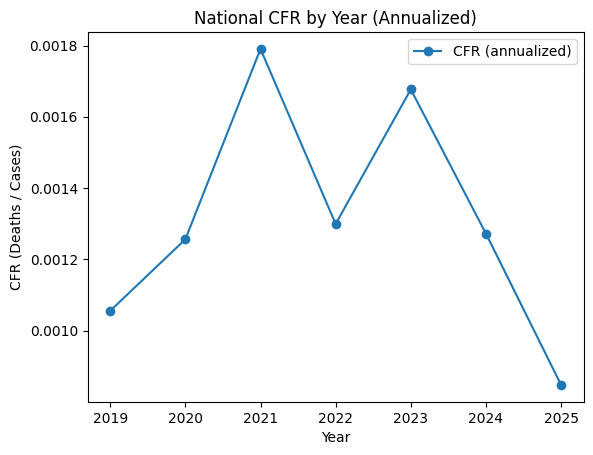

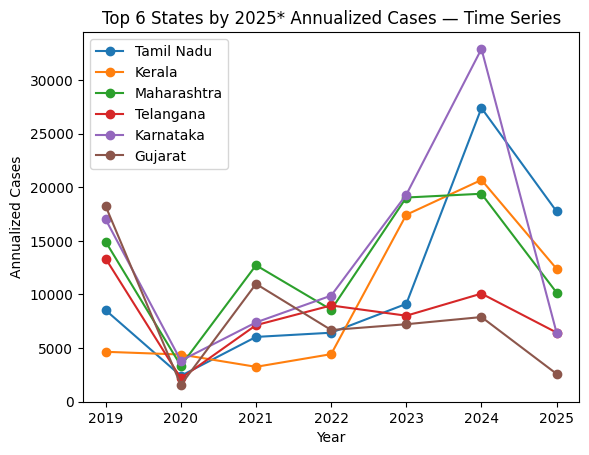

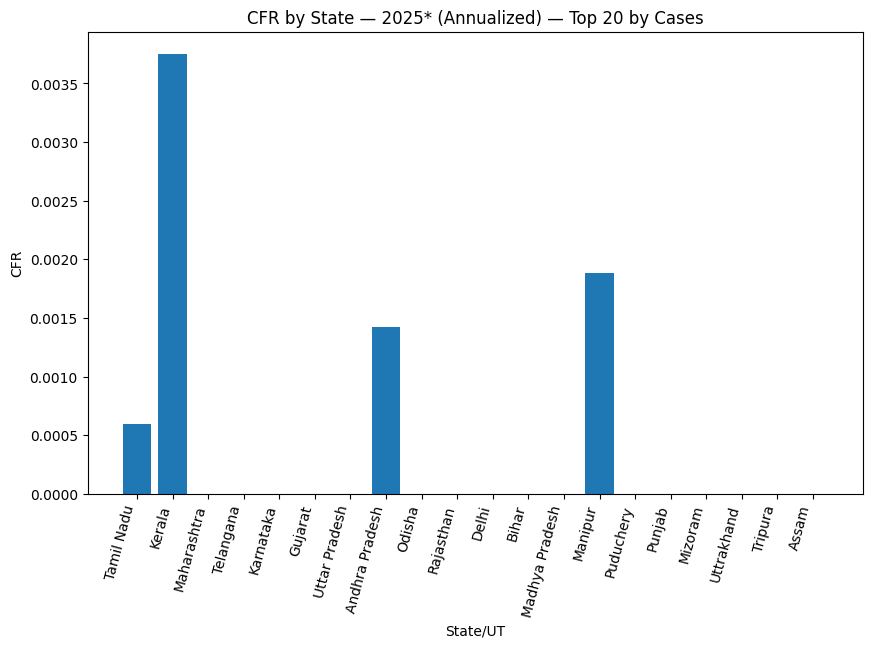

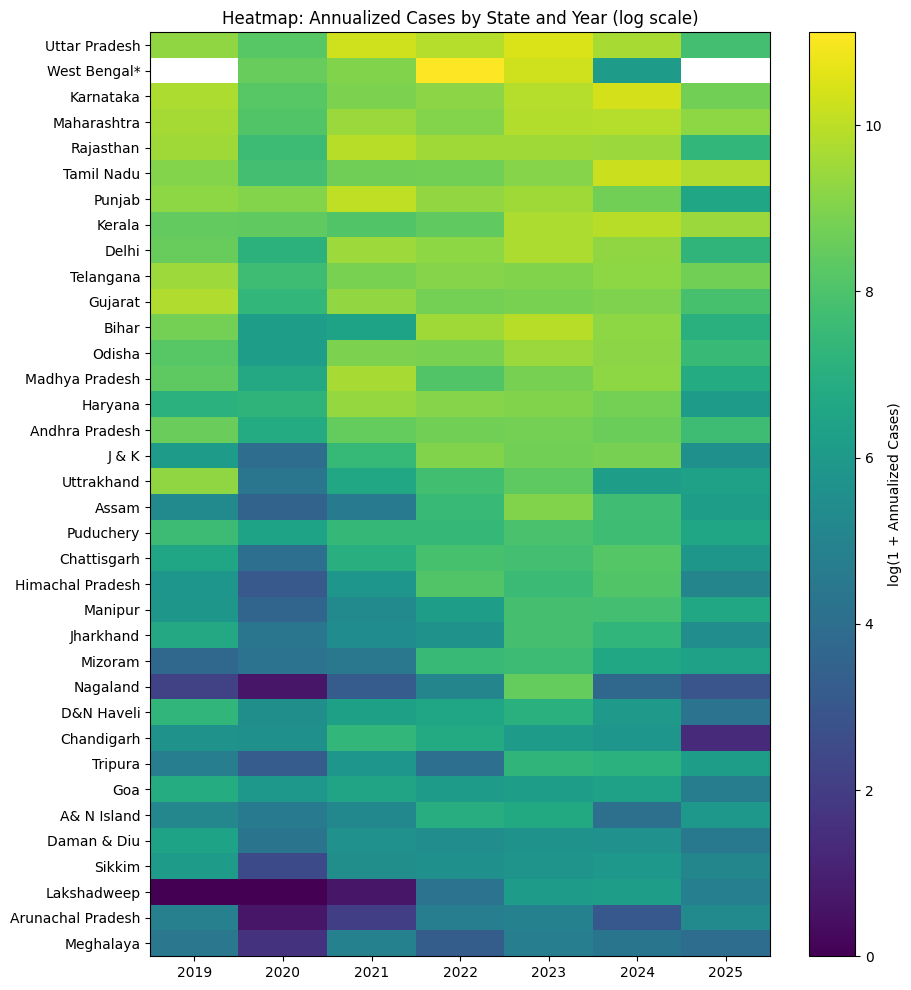

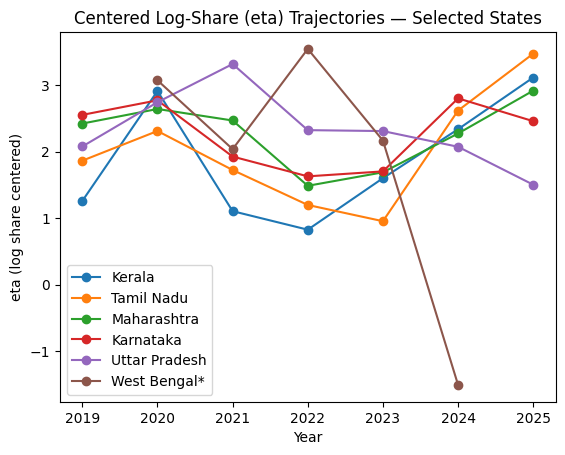

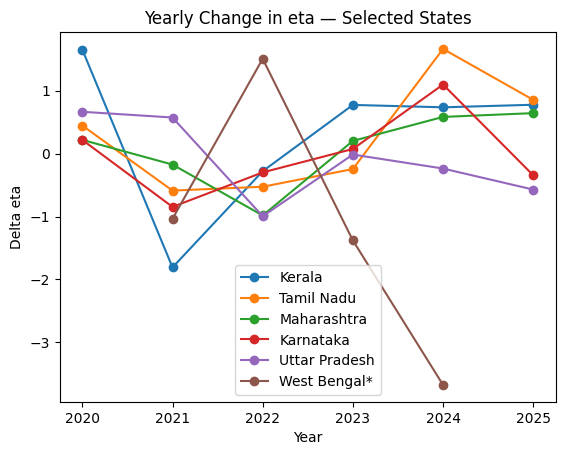

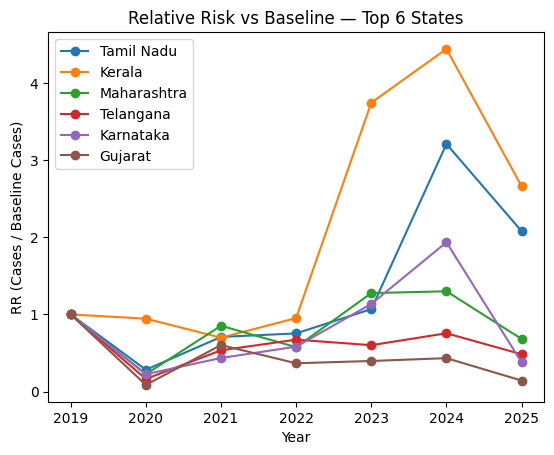

'dengue_outputs.zip'

In [3]:
# Re-run: Apply methodology, generate plots/tables, save and zip.
import os, zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# ---------- Setup ----------
csv_path = "dengue_india_state_2019_2025.csv"
out_dir = "dengue_outputs"
plots_dir = os.path.join(out_dir, "plots")
tables_dir = os.path.join(out_dir, "tables")
os.makedirs(plots_dir, exist_ok=True)
os.makedirs(tables_dir, exist_ok=True)

# ---------- Load data ----------
df = pd.read_csv(csv_path)

# Separate total row
is_total = df["Sl. No."].astype(str).str.contains("Total", na=False)
df_total_row = df[is_total].copy()
df_states = df[~is_total].copy().replace("NR", pd.NA)

# Long reshape
year_cols = [c for c in df_states.columns if "_" in c and c.split("_")[0].isdigit()]
rows = []
for _, r in df_states.iterrows():
    for c in year_cols:
        y, typ = c.split("_")
        y = int(y)
        rows.append({
            "Sl. No.": r["Sl. No."],
            "StateUT": r["Affected States/UTs"],
            "Year": y,
            "Type": "Cases" if typ=="C" else "Deaths",
            "Value": pd.to_numeric(r[c], errors="coerce")
        })
long = pd.DataFrame(rows)
panel = long.pivot_table(index=["Sl. No.","StateUT","Year"], columns="Type", values="Value", aggfunc="first").reset_index()
panel.columns.name = None

# Exposure fraction
panel["Exposure"] = np.where(panel["Year"]<=2024, 1.0, 8.0/12.0)

# Annualized
panel["AnnCases"] = panel["Cases"] / panel["Exposure"]
panel["AnnDeaths"] = panel["Deaths"] / panel["Exposure"]

# CFR
panel["CFR_reported"] = panel["Deaths"] / panel["Cases"]
panel["CFR_annualized"] = panel["AnnDeaths"] / panel["AnnCases"]
panel.loc[~np.isfinite(panel["CFR_reported"]), "CFR_reported"] = np.nan
panel.loc[~np.isfinite(panel["CFR_annualized"]), "CFR_annualized"] = np.nan

# National totals
nat = panel.groupby("Year", as_index=False).agg(
    Cases=("Cases","sum"),
    Deaths=("Deaths","sum"),
    Exposure=("Exposure","mean")
)
nat["AnnCases"] = nat["Cases"] / nat["Exposure"]
nat["AnnDeaths"] = nat["Deaths"] / nat["Exposure"]
nat["CFR_reported"] = nat["Deaths"]/nat["Cases"]
nat["CFR_annualized"] = nat["AnnDeaths"]/nat["AnnCases"]
nat["YoY_Cases_Growth"] = nat["AnnCases"].pct_change()
nat["YoY_Deaths_Growth"] = nat["AnnDeaths"].pct_change()

# Shares & eta
def compute_shares(df_panel):
    dfp = df_panel.copy()
    total = dfp.groupby("Year")["AnnCases"].transform("sum")
    dfp["Share"] = dfp["AnnCases"] / total
    with np.errstate(divide='ignore'):
        dfp["log_s"] = np.log(dfp["Share"])
    dfp.loc[~np.isfinite(dfp["log_s"]), "log_s"] = np.nan
    dfp["mean_log_s_year"] = dfp.groupby("Year")["log_s"].transform("mean")
    dfp["eta"] = dfp["log_s"] - dfp["mean_log_s_year"]
    return dfp

shares = compute_shares(panel)

def top_change_points(shares_df, top_k=2):
    out = []
    for st, g in shares_df.sort_values("Year").groupby("StateUT"):
        g2 = g[["Year","eta"]].dropna().sort_values("Year")
        if len(g2) < 3:
            continue
        g2["delta_eta"] = g2["eta"].diff()
        g2["abs_delta"] = g2["delta_eta"].abs()
        tops = g2.nlargest(top_k, "abs_delta")
        for _, row in tops.iterrows():
            out.append({"StateUT": st, "Year": int(row["Year"]), "abs_delta_eta": float(row["abs_delta"])})
    return pd.DataFrame(out).sort_values(["abs_delta_eta"], ascending=False)

cp_table = top_change_points(shares, top_k=2)

# ---------- Tables ----------
table_national = nat.copy()
for c in ["CFR_reported","CFR_annualized","YoY_Cases_Growth","YoY_Deaths_Growth"]:
    table_national[c] = table_national[c].round(5)

yref = 2025
top_states = (panel[panel["Year"]==yref]
              .sort_values("AnnCases", ascending=False)
              .head(12)[["StateUT","AnnCases","AnnDeaths","CFR_annualized"]]
             ).reset_index(drop=True)

def relative_risk(panel_df):
    out = []
    for st, g in panel_df.sort_values("Year").groupby("StateUT"):
        g = g.copy()
        base_row = g[g["Year"]==2019]
        if base_row.empty or pd.isna(base_row["AnnCases"].values[0]):
            gb = g.dropna(subset=["AnnCases"]).head(1)
            if gb.empty:
                continue
            base_val = gb["AnnCases"].values[0]
            base_year = int(gb["Year"].values[0])
        else:
            base_val = base_row["AnnCases"].values[0]
            base_year = 2019
        g["RR_vs_base"] = g["AnnCases"] / base_val if base_val>0 else np.nan
        g["RR_baseline_year"] = base_year
        out.append(g[["StateUT","Year","AnnCases","RR_vs_base","RR_baseline_year"]])
    return pd.concat(out, ignore_index=True)

rr = relative_risk(panel)

# Save tables
table_national.to_csv(os.path.join(tables_dir, "national_summary.csv"), index=False)
top_states.to_csv(os.path.join(tables_dir, f"top_states_{yref}_annualized.csv"), index=False)
rr.to_csv(os.path.join(tables_dir, "relative_risk_vs_baseline.csv"), index=False)
cp_table.to_csv(os.path.join(tables_dir, "state_change_points_eta.csv"), index=False)
panel.to_csv(os.path.join(tables_dir, "panel_with_shares_cfr.csv"), index=False)
shares[["Sl. No.","StateUT","Year","Share","eta"]].to_csv(os.path.join(tables_dir, "shares_eta.csv"), index=False)

# Display tables
display("National summary (annualized) by year", table_national)
display("Top 12 states by 2025* annualized cases", top_states)
display("Relative Risk vs baseline (head of table)", rr.head(120))
display("Detected change-points (eta jumps) — head", cp_table.head(50))

# ---------- Plots ----------
plt.ioff()

# 1) National cases (reported vs annualized)
plt.figure()
plt.plot(nat["Year"], nat["Cases"], marker="o", label="Cases (reported)")
plt.plot(nat["Year"], nat["AnnCases"], marker="o", linestyle="--", label="Cases (annualized)")
plt.title("National Dengue Cases by Year (Reported vs Annualized)")
plt.xlabel("Year")
plt.ylabel("Cases")
plt.legend()
plt.savefig(os.path.join(plots_dir, "national_cases_reported_vs_annualized.png"), dpi=160, bbox_inches="tight")
plt.show()

# 2) National deaths (annualized)
plt.figure()
plt.plot(nat["Year"], nat["AnnDeaths"], marker="o", label="Deaths (annualized)")
plt.title("National Dengue Deaths by Year (Annualized)")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.legend()
plt.savefig(os.path.join(plots_dir, "national_deaths_annualized.png"), dpi=160, bbox_inches="tight")
plt.show()

# 3) National CFR (annualized)
plt.figure()
plt.plot(nat["Year"], nat["CFR_annualized"], marker="o", label="CFR (annualized)")
plt.title("National CFR by Year (Annualized)")
plt.xlabel("Year")
plt.ylabel("CFR (Deaths / Cases)")
plt.legend()
plt.savefig(os.path.join(plots_dir, "national_cfr_annualized.png"), dpi=160, bbox_inches="tight")
plt.show()

# 4) Top 6 states time series (annualized cases)
top6 = (panel[panel["Year"]==yref]
        .sort_values("AnnCases", ascending=False)
        .head(6)["StateUT"].tolist())
plt.figure()
for st in top6:
    g = panel[panel["StateUT"]==st].sort_values("Year")
    plt.plot(g["Year"], g["AnnCases"], marker="o", label=st)
plt.title("Top 6 States by 2025* Annualized Cases — Time Series")
plt.xlabel("Year")
plt.ylabel("Annualized Cases")
plt.legend()
plt.savefig(os.path.join(plots_dir, "top6_states_time_series_annualized_cases.png"), dpi=160, bbox_inches="tight")
plt.show()

# 5) CFR by state, 2025 annualized (top 20 by cases)
d2025 = panel[panel["Year"]==yref].dropna(subset=["AnnCases"]).sort_values("AnnCases", ascending=False).head(20)
plt.figure(figsize=(10,6))
plt.bar(d2025["StateUT"], d2025["CFR_annualized"])
plt.title("CFR by State — 2025* (Annualized) — Top 20 by Cases")
plt.xlabel("State/UT")
plt.ylabel("CFR")
plt.xticks(rotation=75, ha="right")
plt.savefig(os.path.join(plots_dir, "cfr_by_state_2025_annualized_top20.png"), dpi=200, bbox_inches="tight")
plt.show()

# 6) Heatmap of annualized cases (log scale)
mat = panel.pivot_table(index="StateUT", columns="Year", values="AnnCases", aggfunc="first")
state_order = mat.sum(axis=1).sort_values(ascending=False).index
mat = mat.loc[state_order]
plt.figure(figsize=(10,12))
plt.imshow(np.log1p(mat.values), aspect="auto")
plt.colorbar(label="log(1 + Annualized Cases)")
plt.yticks(ticks=np.arange(len(mat.index)), labels=mat.index)
plt.xticks(ticks=np.arange(len(mat.columns)), labels=mat.columns, rotation=0)
plt.title("Heatmap: Annualized Cases by State and Year (log scale)")
plt.savefig(os.path.join(plots_dir, "heatmap_annualized_cases_log.png"), dpi=180, bbox_inches="tight")
plt.show()

# 7) Eta trajectories for selected states
sel_states = ["Kerala", "Tamil Nadu", "Maharashtra", "Karnataka", "Uttar Pradesh", "West Bengal*"]
plt.figure()
for st in sel_states:
    g = shares[shares["StateUT"]==st].sort_values("Year")
    if g["eta"].notna().sum()==0:
        continue
    plt.plot(g["Year"], g["eta"], marker="o", label=st)
plt.title("Centered Log-Share (eta) Trajectories — Selected States")
plt.xlabel("Year")
plt.ylabel("eta (log share centered)")
plt.legend()
plt.savefig(os.path.join(plots_dir, "eta_trajectories_selected.png"), dpi=160, bbox_inches="tight")
plt.show()

# 8) Yearly change in eta for selected states
plt.figure()
for st in sel_states:
    g = shares[shares["StateUT"]==st].sort_values("Year")[["Year","eta"]].dropna()
    if len(g) < 2:
        continue
    plt.plot(g["Year"], g["eta"].diff(), marker="o", label=st)
plt.title("Yearly Change in eta — Selected States")
plt.xlabel("Year")
plt.ylabel("Delta eta")
plt.legend()
plt.savefig(os.path.join(plots_dir, "delta_eta_selected.png"), dpi=160, bbox_inches="tight")
plt.show()

# 9) Relative risk vs baseline for top 6 states
plt.figure()
for st in top6:
    g = rr[rr["StateUT"]==st].sort_values("Year")
    plt.plot(g["Year"], g["RR_vs_base"], marker="o", label=st)
plt.title("Relative Risk vs Baseline — Top 6 States")
plt.xlabel("Year")
plt.ylabel("RR (Cases / Baseline Cases)")
plt.legend()
plt.savefig(os.path.join(plots_dir, "rr_vs_baseline_top6.png"), dpi=160, bbox_inches="tight")
plt.show()

# ---------- Bundle everything into ZIP ----------
zip_path = "dengue_outputs.zip"
with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    for fname in os.listdir(plots_dir):
        zf.write(os.path.join(plots_dir, fname), arcname=f"plots/{fname}")
    for fname in os.listdir(tables_dir):
        zf.write(os.path.join(tables_dir, fname), arcname=f"tables/{fname}")

zip_path